In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "../data/cliente_bi.csv"  # Sustituye con la ruta real de tu archivo
df = pd.read_csv(file_path)

In [3]:
df

,Customer_ID,Edad,RENTA_MEDIA_ESTIMADA,GENERO,Fecha_nacimiento,STATUS_SOCIAL,CODIGO_POSTAL,provincia,poblacion,lat,...,Compra_Tienda_Unica,Contrato_Seguro_Bateria,Coste_Medio_Cliente,Margen_Bruto_Medio,Margen_eur_Medio,Rentabilidad_Relativa,Dias_Medios_Desde_Ultima_Revision,churn_medio_estimado,retencion,CLV_5_anos
0,1,47,25641,M,11/01/1977,H,CP8470,Barcelona,Campins,2.463162,...,1,0,3265.320068,6131.069824,2865.750000,0.877632,0,0.272211,0.727789,5210.588655
1,7,36,0,F,09/01/1988,NaN,CP47009,Valladolid,Valladolid,-4.723349,...,1,0,2329.600098,4254.600098,1925.000000,0.826322,0,1.000000,0.000000,0.000000
2,10,39,0,M,09/01/1985,NaN,CP3130,Alicante/Alacant,Santa Pola,-0.555281,...,1,0,1890.599976,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117
3,11,53,0,M,13/01/1971,NaN,CP8711,Barcelona,Òdena,1.638468,...,1,0,1890.599976,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117
4,12,47,27287,M,11/01/1977,G,CP17006,Girona,Girona,2.824119,...,1,0,1859.479980,3543.679932,1684.199951,0.905737,960,0.549063,0.450937,1211.345223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44048,99995,38,0,F,09/01/1986,NaN,CP8027,Barcelona,Barcelona,2.176349,...,1,0,6860.250000,9373.139648,2512.889893,0.366297,0,0.441196,0.558804,2641.998302
44049,99996,26,25909,F,06/01/1998,H,CP8140,Barcelona,Caldes de Montbui,2.164881,...,0,0,6698.509766,7687.030273,988.520020,0.147573,591,0.213327,0.786673,2156.374108
44050,99998,34,25191,M,08/01/1990,H,CP12580,Castellón/Castelló,Benicarló,0.423963,...,0,0,4265.944824,5134.584961,868.640015,0.203622,283,0.190247,0.809753,2033.052134
44051,99999,28,28967,F,07/01/1996,U,CP17152,Girona,Sant Martí de Llémena,2.646503,...,1,0,3331.919922,6302.669922,2970.750000,0.891603,998,0.817440,0.182560,611.356909


In [4]:
columnas_pca = [
    "Edad_Media_Coche",
    "RENTA_MEDIA_ESTIMADA",
    "Total_Compras",
    "PVP_Medio",
    "Dias_Desde_Ultima_Compra",
    "Total_Revisiones",
    "Coste_Medio_Cliente",
    "CLV_5_anos",
    "Margen_eur_Medio",
    "Km_Medio_por_Revision"  # Añadido aquí
]


In [5]:
df_pca = df[columnas_pca].dropna()

In [6]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [7]:
pca = PCA()
pca.fit(df_scaled)

PCA()

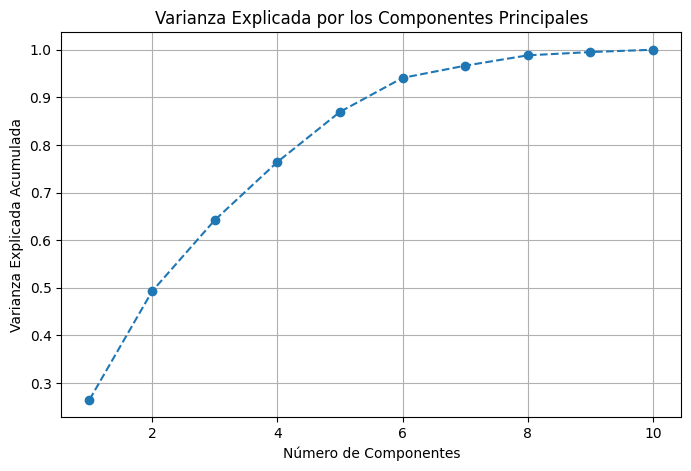

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por los Componentes Principales")
plt.grid()
plt.show()